#### Tesla Stock Prediction

The Tesla stock dataset contains historical data for Tesla stock starting from June 29th, 2010 and ending on February 3rd, 2023 filtered by the main metrics that matter for a financial analysis as well as market intelligence. This dataset includes the following key columns:This dataset includes the following key columns: 
 
- Date: The date as the particular trading day to which it refers or the measurement can be in days, weeks, months or any specified range. 
- Open: This is the first price recorded when the market began the trading of Tesla’s stocks later in the day. 
- High: The maximum price of Tesla’s stock in trading session. 
- Low: The minimum stock price that Tesla was sold for within the course of the trading day. 
- Close: The last price available of the trading day for Tesla Motor’s stocks. 
- Volume: The total count of Tesla shares that exist in the market and were bought and sold during a specific day. 
 
An analysis of this kind of data will enable one to study the trend of the stock as well as its volatility, traffic, and even the sentiment of investors towards Tesla’s stocks over a long period of time. This data is highly beneficial for performing a fundamental analysis for understanding the future patterns of the company’s stock price as well as for comprehending the general trends in the stock market influencing Tesla’s stock price.

#### Importing Library Files

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("Tesla.csv")
data

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
3164,12/22/2023,256.760010,258.220001,251.369995,252.539993,93249800
3165,12/26/2023,254.490005,257.970001,252.910004,256.609985,86892400
3166,12/27/2023,258.350006,263.339996,257.519989,261.440002,106494400
3167,12/28/2023,263.660004,265.130005,252.710007,253.179993,113619900


#### DataSet Overview

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3169 non-null   object 
 1   Open    3169 non-null   float64
 2   High    3169 non-null   float64
 3   Low     3169 non-null   float64
 4   Close   3169 non-null   float64
 5   Volume  3169 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 148.7+ KB


- df.info() provides a summary of the DataFrame's structure: it shows the number of rows, column names, data types, and counts of non-null values per column. This method helps identify missing data and understand the memory usage of the DataFrame.

#### Handling Missing Values

In [4]:
print( data.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


This output indicates the result of `df.isnull().sum()` or a similar operation, which shows the number of missing values (null values) for each column in your DataFrame `df`. In this case:

- **Date:** 0 missing values
- **Open:** 0 missing values
- **High:** 0 missing values
- **Low:** 0 missing values
- **Close:** 0 missing values
- **Volume:** 0 missing values

This means that there are no missing values in any of these columns. Having zeros across the board indicates that the dataset is complete in terms of these specific data points, which is ideal for analysis and modeling without needing to handle missing data.

#### Detecting And Treating Outliers

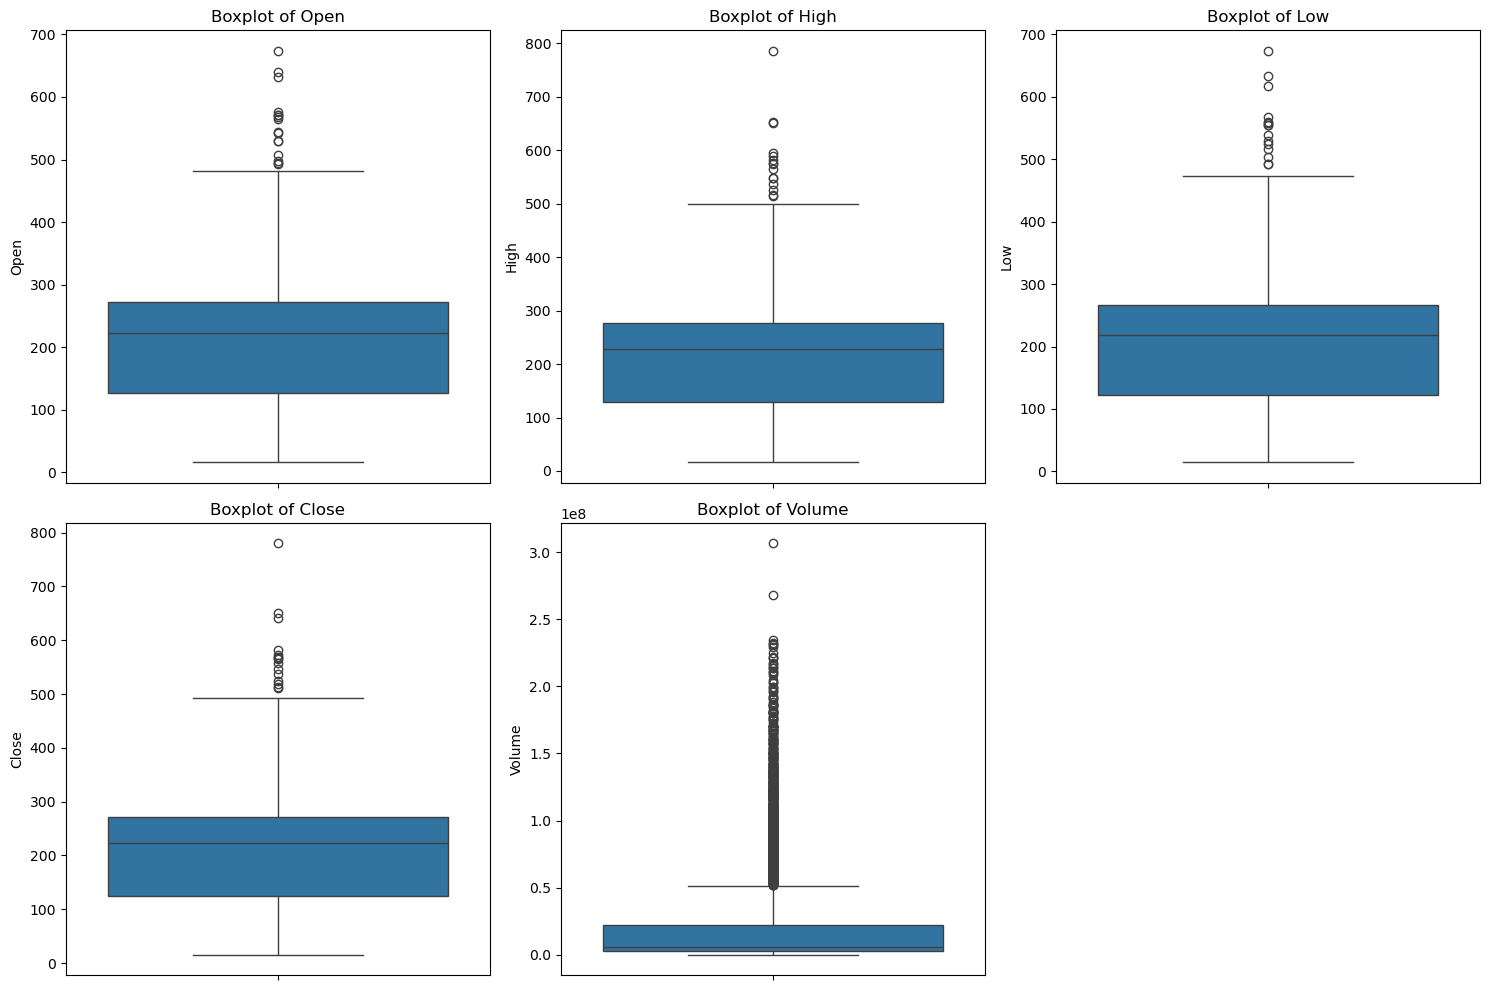

In [5]:
# Plot boxplots to detect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Open', 'High', 'Low', 'Close', 'Volume']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


The image above shows boxplots of the Open, High, Low, Close and Volume columns. **There are outliers in all 5 columns.**

**Outliers** are data points that are significantly different from other data points in a dataset. In boxplots, outliers are represented by points outside the whiskers. The whiskers extend to 1.5 times the interquartile range (IQR) from the quartiles. Any points beyond the whiskers are considered outliers.

In the given boxplots, the outliers are the points that are significantly higher or lower than the rest of the data points. These outliers could be caused by a number of factors, such as errors in data entry, unusual market conditions, or other unforeseen circumstances.

In [6]:
# Treat outliers by capping them using the IQR method
for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
    Q1 = data[column].quantile(0.25)    # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)    # Third quartile (75th percentile)
    IQR = Q3 - Q1                       # Interquartile Range (IQR)
    
    # Calculate bounds to cap outliers
    lower_bound = Q1 - 1.5 * IQR       # Lower bound
    upper_bound = Q3 + 1.5 * IQR       # Upper bound
    
    # Cap outliers
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)


**1.Iterating Through Columns:**
- The loop iterates over columns 'Open', 'High', 'Low', 'Close', 'Volume' in DataFrame data.

**2.Calculating IQR and Bounds:**
- Q1, Q3, and IQR are calculated to define the interquartile range.
lower_bound and upper_bound are computed to cap outliers outside 1.5 times the IQR from the first and third quartiles.

**3.Clipping Outliers:**
- clip is applied to data[column] to limit values to the computed lower_bound and upper_bound.

**Purpose:**
- This process ensures that extreme values in the dataset are adjusted to maintain data integrity and reliability for subsequent analyses or modeling tasks

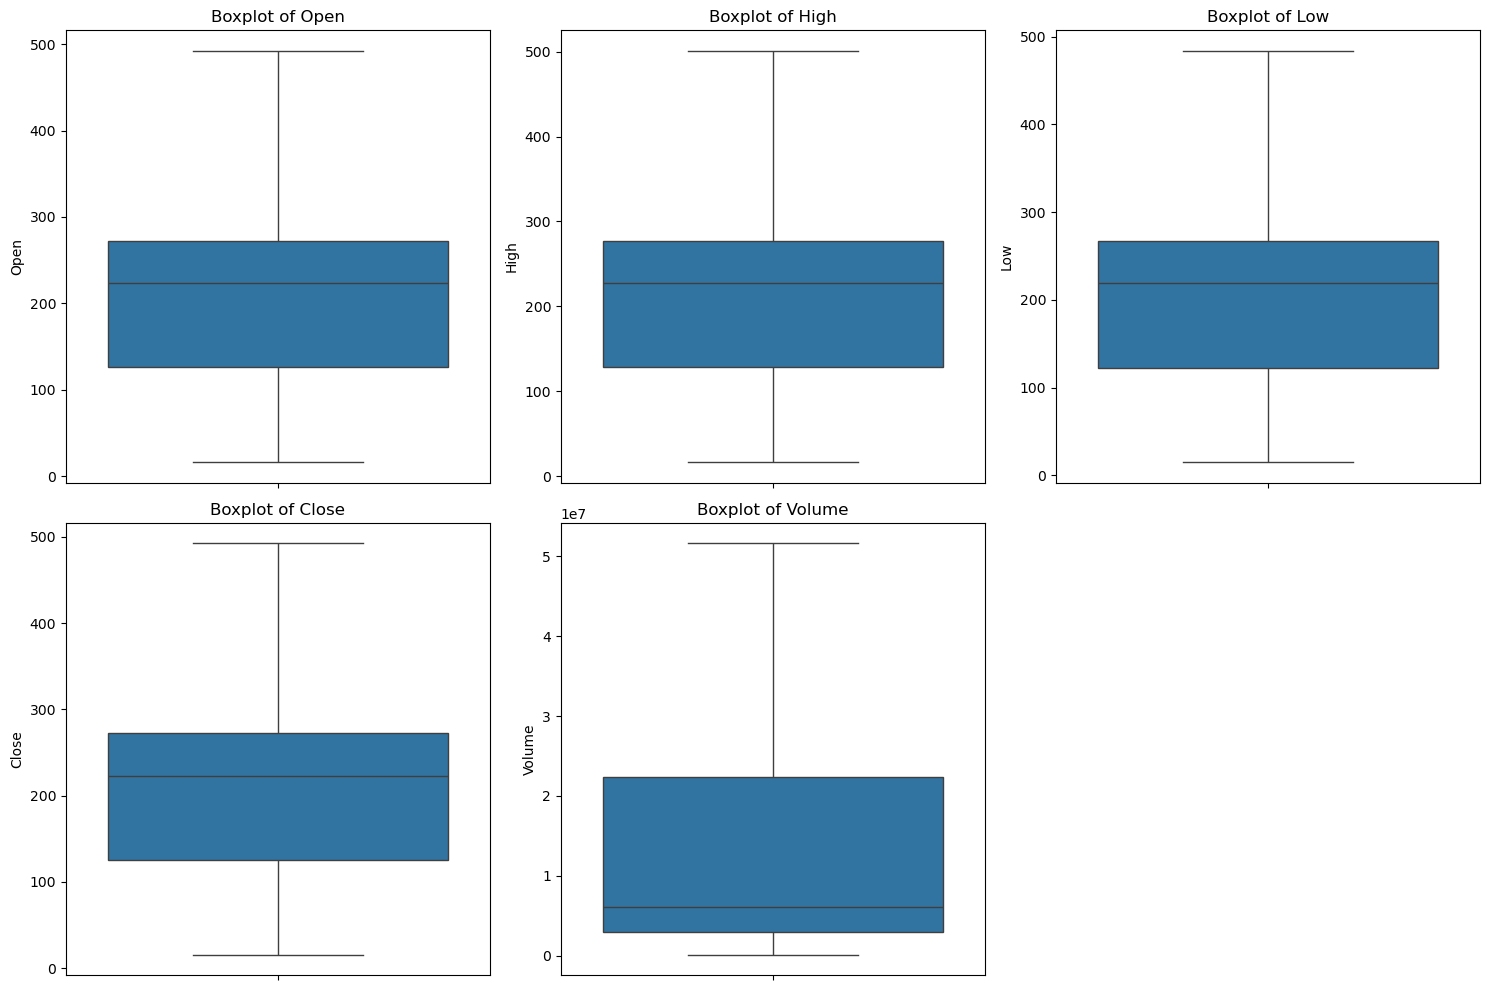

In [7]:
# Plot boxplots after applying IQR method
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Open', 'High', 'Low', 'Close', 'Volume']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


After analyzing the boxplots above, outliers were identified and removed using the IQR method. This technique involved setting reasonable boundaries based on the data's quartiles and adjusting any values that fell outside these boundaries. This process ensures that our dataset is now more reliable for further analysis and modeling.

#### Normalizing Variables

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the 'Open', 'High', 'Low', 'Close', 'Volume' columns
scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])

# Verify normalization
data.head()


,Date,Open,High,Low,Close,Volume
0,6/29/2010,0.006006,0.017285,0.005460,0.016969,0.361928
1,6/30/2010,0.020265,0.028478,0.017746,0.016843,0.331278
2,7/1/2010,0.018606,0.019185,0.011283,0.012921,0.157216
3,7/2/2010,0.014406,0.013361,0.007956,0.007132,0.097457
4,7/6/2010,0.008106,0.006959,0.001813,0.000650,0.130977


**What is Normalization?**
- Normalization, in the context of data preprocessing, refers to rescaling numerical data to a common scale, typically [0, 1]. It is done to ensure that all features contribute equally to model fitting and interpretation.


<!DOCTYPE html>
<html>
<head>
</head>
<body>

<h3>Explanation:</h3>

<ul>
  <li><code>from sklearn.preprocessing import MinMaxScaler</code>: Imports <code>MinMaxScaler</code> class.</li>
  <li><code>scaler = MinMaxScaler()</code>: Creates a scaler object.</li>
  <li><code>data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])</code>: Normalizes selected columns using <code>MinMaxScaler</code>.</li>
  <li><code>data.head()</code>: Displays first few rows after normalization.</li>
</ul>

<h3>Normalization Explanation:</h3>

<ul>
  <li><strong>Importing MinMaxScaler:</strong> Imports <code>MinMaxScaler</code> from <code>sklearn.preprocessing</code>.</li>
  <li><strong>Creating a Scaler Object:</strong> Initializes a <code>MinMaxScaler</code> object.</li>
  <li><strong>Normalization Process:</strong> Applies normalization to 'Open', 'High', 'Low', 'Close', and 'Volume' columns.</li>
  <li><strong>Verification:</strong> Displays initial rows after normalization to confirm process.</li>
</ul>

</body>
</html>


#### Visualizing Data Distribution

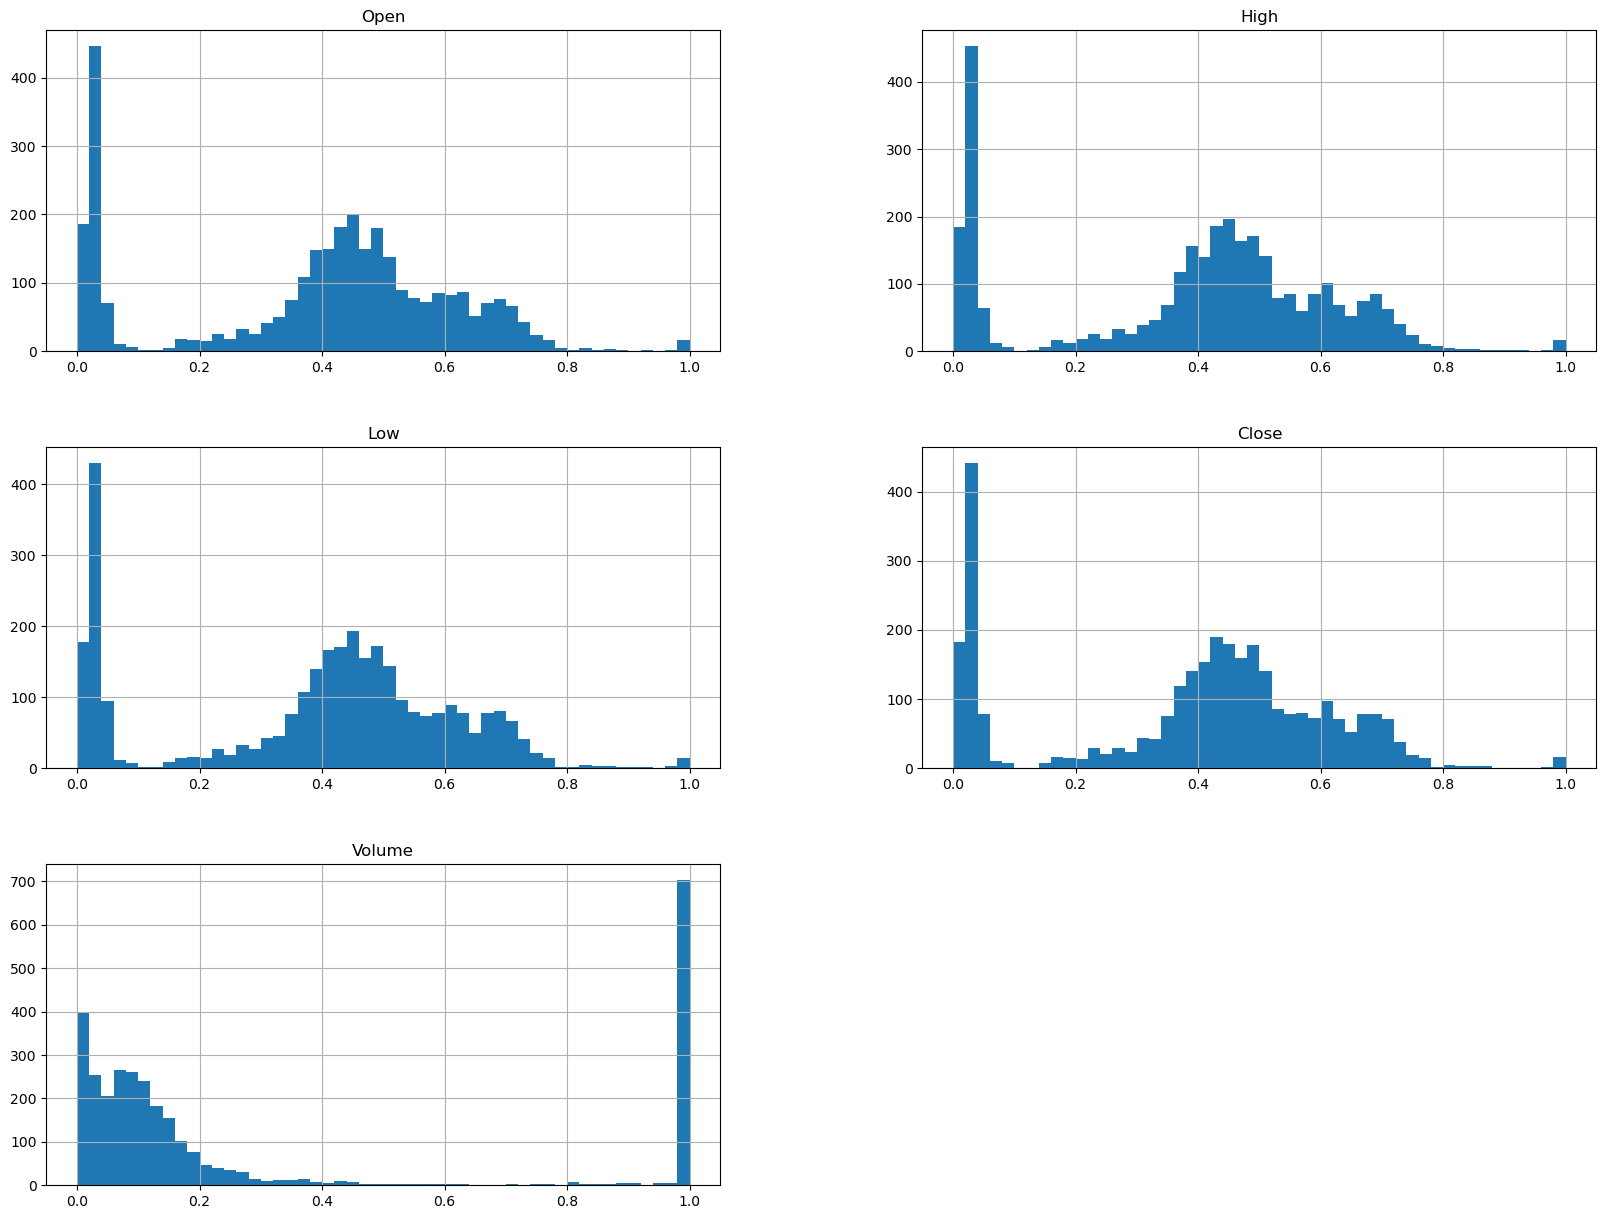

In [9]:
# Plot histograms for each column
data.hist(bins=50, figsize=(20, 15))
plt.show()

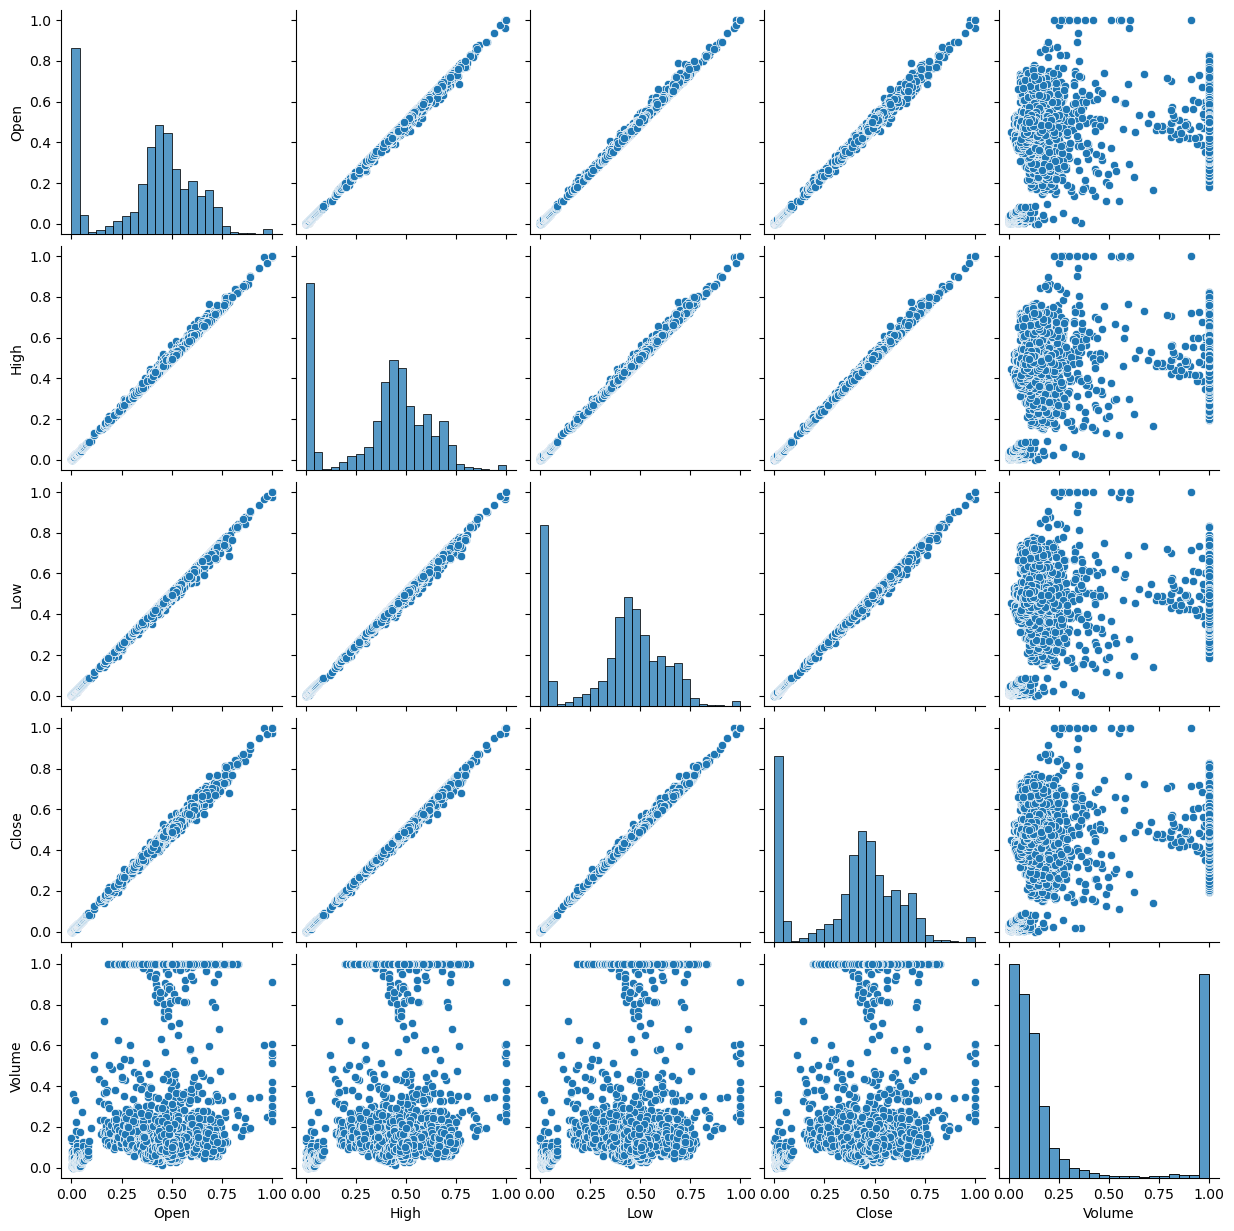

In [10]:
# Plot pair plots to visualize relationships
sns.pairplot(data)
plt.show()

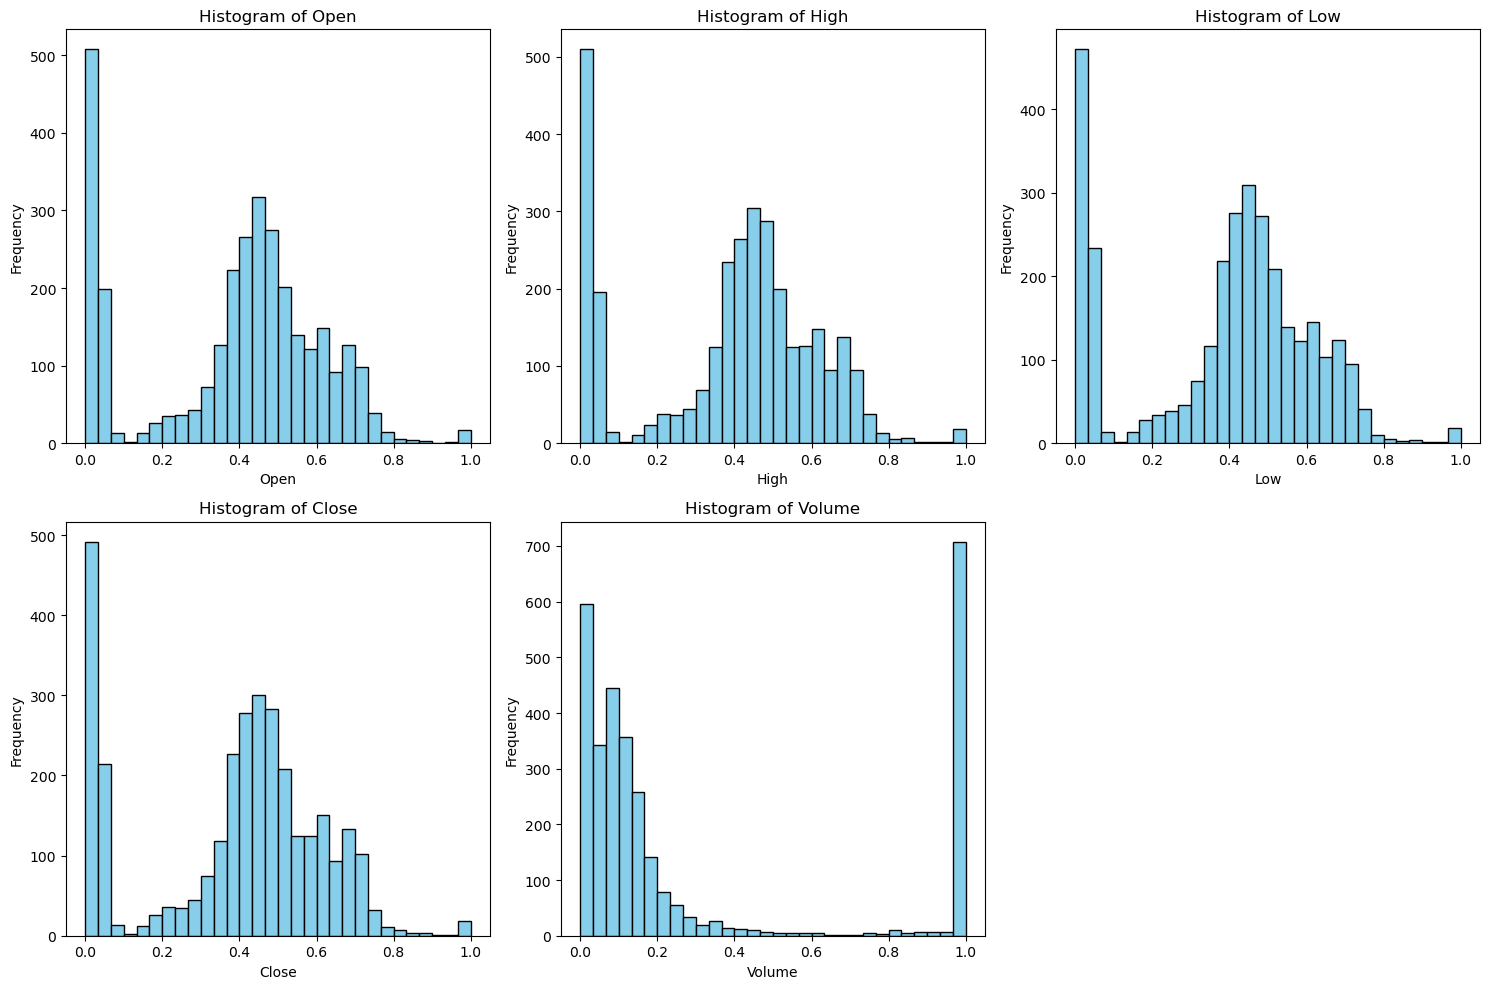

In [11]:
# Histograms for each numeric column
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Open', 'High', 'Low', 'Close', 'Volume']):
    plt.subplot(2, 3, i + 1)
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


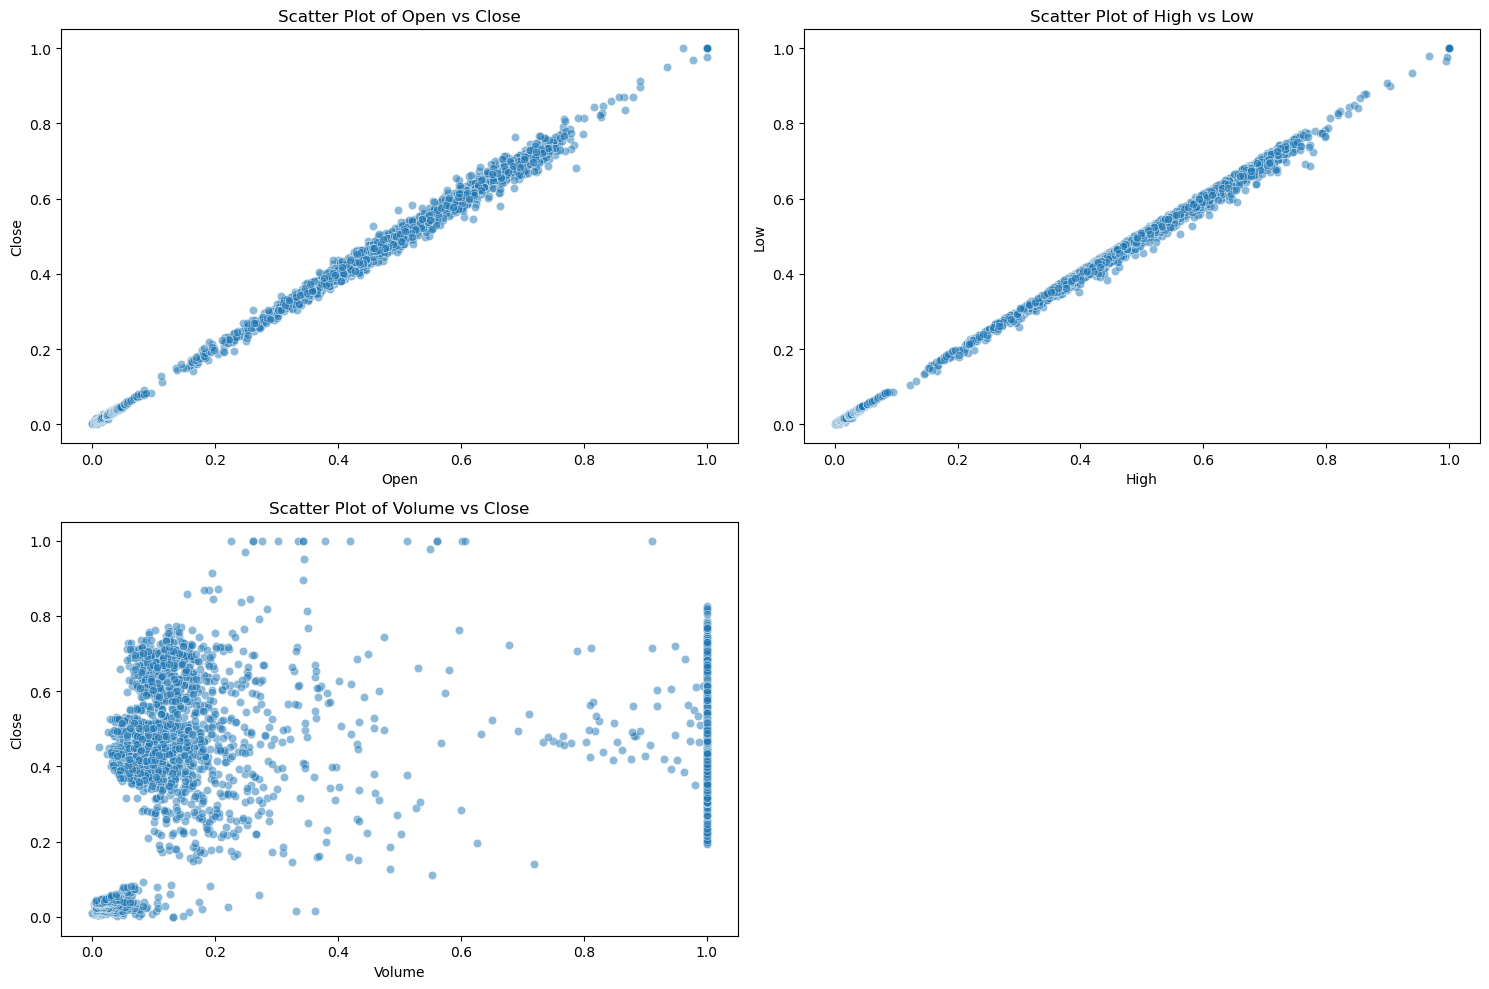

In [12]:
# Scatter plots for pairwise relationships
plt.figure(figsize=(15, 10))
pairs = [('Open', 'Close'), ('High', 'Low'), ('Volume', 'Close')]
for i, (col1, col2) in enumerate(pairs):
    plt.subplot(2, 2, i + 1)
    plt.scatter(data[col1], data[col2], alpha=0.5, edgecolors='w', linewidth=0.5)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
plt.tight_layout()
plt.show()


#### Identifying Patterns And Trends

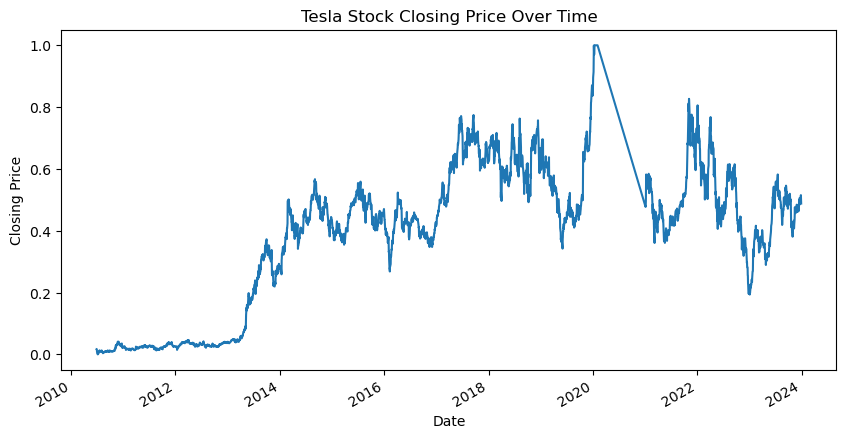

In [13]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Plot the closing price over time
plt.figure(figsize=(10, 5))
data['Close'].plot()
plt.title('Tesla Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

The graph above shows the closing price of Tesla stock over time, from 2010 to 2024.
The graph shows a general upward trend, with a few periods of decline.

**Here's a breakdown of the trend:**
- 2010-2014: The stock price is relatively low and fluctuates within a narrow range.
- 2014-2020: The stock experiences significant growth, with a notable spike around 2019.
- 2020-2021: The stock reaches its peak and then experiences a sharp decline.
- 2022-2024: The stock continues to fluctuate, with periods of growth and decline.

Overall, the graph demonstrates the volatile nature of the stock market, with Tesla stock experiencing significant upswings and downturns over the years.

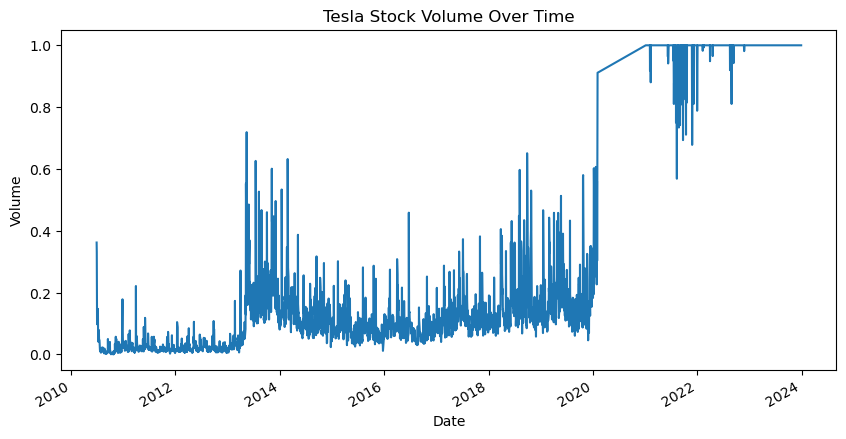

In [14]:
# Plot the volume over time
plt.figure(figsize=(10, 5))
data['Volume'].plot()
plt.title('Tesla Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

This graph presents the trading volume that has been made on the Tesla stock. On the y-axis there is the volume and on the x-axis – date. It is obvious that the over all volume is on the rise although there are distinct variations in the pattern. 
 
**Here are some key observations:Here are some key observations:** 
 
- **Increased Trading Volume:** Day by day the volume of the Tesla is rising in the market which means the world is also showing more and more interest in this company and the stock of this company. 
- **Spikes in Volume:** Analyzing the graph, it is possible to observe several points marked with a high volume – these points might be connected with significant events influencing the change in Tesla’s stock price, for example, with the company’s product releases, earnings reports, or other related events. 
- **Stable Period:** After 2010 up to around 2014, the volume was not rapidly increasing and only maintained at a specific level which indicates that there was not much activities of concisely of Tesla stock. 
- **Sudden Increase in 2014-2021:** From 2014, the number experienced a jump up, which can be connected with the growing popularity and produciveness of Tesla. 
- **Recent Drop in Volume:** Analyzing the volume, it is possible to state that in 2022, it decreased sharply. This could be due to numerous reasons such as market volatilities, operation of the coronavirus pandemic, and shifts in investors’ attitude. 

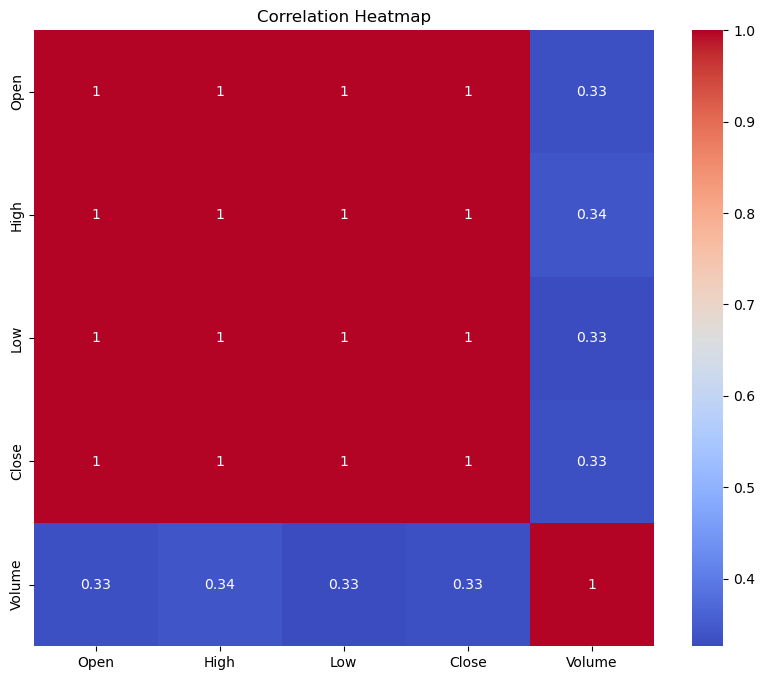

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The scatter plot shows the frequency of the values of two different fields of a dataset while the correlation heatmap illustrates the likeness of various features of a dataset. Here the mentioned dataset may have details about the stock prices of a company or some index stock. 
 
**Here's how to interpret the heatmap:**
 
- Color: The color of each cell refers to the correlation coefficient of two features of the tenant. 
 
- **Red:** High positive correlation. Direction of movement of features is same. 
- **Blue:** High negative correlation. There is perfect negative correlation between two features. 
- **White:** No correlation. 
- **Values:** The correlation coefficients are the numbers placed into the cells. They lie between - 1 and + 1. 
 
**1: Perfect positive correlation** 
**-1: Perfect negative correlation** 
**0: No correlation** 
 
**Interpreting the heatmap:** 
 
- **Open, High, Low, Close:** These features are also stated to have a very high positive correlation. This is expected as they all depict stock prices at different times during the trading period for the particular stock.

- **Volume vs. Price features:** These are in moderate postive relationship with each other. This implies that as trading volume rises, there is a likelihood that prices will go up that is supported by the coefficient of 0. 268.

- **Daily_Change vs. other features:** It has very low dependencies with the other features such as the following disposal volume; there is even a slight negative dependency. This implies that other features do not significantly affect the daily price fluctuations quite much.

##### In the following code i drop our target column which we want to predict.. In this case, our target columns is Volume

In [16]:
# Separating features and target variable
X = data[['Open', 'High', 'Low', 'Close']]
y = data['Volume']

In [17]:
X

,Open,High,Low,Close
Date,,,,
2010-06-29,0.006006,0.017285,0.005460,0.016969
2010-06-30,0.020265,0.028478,0.017746,0.016843
2010-07-01,0.018606,0.019185,0.011283,0.012921
2010-07-02,0.014406,0.013361,0.007956,0.007132
2010-07-06,0.008106,0.006959,0.001813,0.000650
...,...,...,...,...
2023-12-22,0.505303,0.498906,0.504204,0.496570
2023-12-26,0.500536,0.498389,0.507488,0.505107
2023-12-27,0.508642,0.509479,0.517321,0.515239


##### as you can see in the above dataframe our target column is dropped from the dataset..

##### train_test_split

The train_test_split function from the sklearn can be used to split the data in the format of matrix to have some of the data set used for testing while the other is used for training. model_selection module is one of the important steps while pre-processing the data for machine learning. 

It is used to split the dataset into two sets: which can be divided into a training set and a testing set. This split helps in measuring the efficiency of the machine learning model on unseen data, which gives a probable performance on the fresh, live data.

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1. **Scaling the Features:** We use `StandardScaler` to standardize the features, ensuring they have a mean of 0 and a standard deviation of 1.
2. **Fit and Transform on Training Data:** The scaler is fitted to the training data (`X_train`) and then used to transform it into a scaled version (`X_train_scaled`).
3. **Transform Test Data:** The same scaler is applied to the test data (`X_test`) to ensure consistent scaling, producing `X_test_scaled`.


In [20]:
# Function to print a complete report for the model
def print_report(model_name, y_test, y_pred):
    print(f"{model_name} Evaluation Metrics:")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}\n")

### Function to Print a Complete Model Report

- **Purpose:** The `print_report` function generates and displays key performance metrics for a regression model.
- **Parameters:**
  - `model_name`: The name of the model being evaluated.
  - `y_test`: The actual target values from the test set.
  - `y_pred`: The predicted values from the model.
    

- **Metrics Displayed:**
  - **Mean Absolute Error (MAE):** Average absolute difference between actual and predicted values.
  - **Mean Squared Error (MSE):** Average squared difference between actual and predicted values.
  - **Root Mean Squared Error (RMSE):** Square root of the MSE, providing error in the same units as the target.
  - **R² Score:** Proportion of the variance in the target variable that is predictable from the features.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [22]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear = linear_reg.predict(X_test_scaled)
print_report("Linear Regression", y_test, y_pred_linear)

Linear Regression Evaluation Metrics:
Mean Absolute Error: 0.2606
Mean Squared Error: 0.1097
Root Mean Squared Error: 0.3312
R² Score: 0.2369



### Linear Regression Evaluation Metrics

- **Mean Absolute Error (MAE):** 0.2606  
  Measures the average absolute error between predicted and actual values. Lower values indicate better performance.

- **Mean Squared Error (MSE):** 0.1097  
  Measures the average of the squared differences between predicted and actual values. Lower values indicate better performance.

- **Root Mean Squared Error (RMSE):** 0.3312  
  The square root of the MSE, providing error in the same units as the target variable. Lower values indicate better performance.

- **R² Score:** 0.2369  
  Indicates the proportion of variance in the target variable that is predictable from the features. Values closer to 1 suggest a better fit.


In [23]:
# Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
y_pred_tree = decision_tree.predict(X_test_scaled)
print_report("Decision Tree Regressor", y_test, y_pred_tree)

Decision Tree Regressor Evaluation Metrics:
Mean Absolute Error: 0.2525
Mean Squared Error: 0.1949
Root Mean Squared Error: 0.4415
R² Score: -0.3560



### Decision Tree Regressor Evaluation Metrics

- **Mean Absolute Error (MAE):** 0.2525  
  Measures the average absolute error between predicted and actual values. Lower values indicate better performance.

- **Mean Squared Error (MSE):** 0.1949  
  Measures the average of the squared differences between predicted and actual values. Lower values indicate better performance.

- **Root Mean Squared Error (RMSE):** 0.4415  
  The square root of the MSE, providing error in the same units as the target variable. Lower values indicate better performance.

- **R² Score:** -0.3560  
  Indicates the proportion of variance in the target variable that is predictable from the features. Negative values suggest the model performs worse than a horizontal line (mean value of the target).


In [24]:
# Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_forest = random_forest.predict(X_test_scaled)
print_report("Random Forest Regressor", y_test, y_pred_forest)

Random Forest Regressor Evaluation Metrics:
Mean Absolute Error: 0.2367
Mean Squared Error: 0.1132
Root Mean Squared Error: 0.3365
R² Score: 0.2124



### Random Forest Regressor Evaluation Metrics

- **Mean Absolute Error (MAE):** 0.2368  
  Measures the average absolute error between predicted and actual values. Lower values indicate better performance.

- **Mean Squared Error (MSE):** 0.1132  
  Measures the average of the squared differences between predicted and actual values. Lower values indicate better performance.

- **Root Mean Squared Error (RMSE):** 0.3365  
  The square root of the MSE, providing error in the same units as the target variable. Lower values indicate better performance.

- **R² Score:** 0.2121  
  Indicates the proportion of variance in the target variable that is predictable from the features. Values closer to 1 suggest a better fit.


##### Lets Make a Comparison of These Three Models 

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [26]:

# Function to evaluate model performance
def evaluate_model(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print("\n")
    return {"Model": model_name, "MSE": mse, "R2 Score": r2, "MAE": mae}

# Store results in a list
results = []

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear = linear_reg.predict(X_test_scaled)
results.append(evaluate_model("Linear Regression", y_test, y_pred_linear))

# Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
y_pred_tree = decision_tree.predict(X_test_scaled)
results.append(evaluate_model("Decision Tree Regressor", y_test, y_pred_tree))

# Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_forest = random_forest.predict(X_test_scaled)
results.append(evaluate_model("Random Forest Regressor", y_test, y_pred_forest))


Linear Regression Performance:
Mean Squared Error: 0.1097
R^2 Score: 0.2369
Mean Absolute Error: 0.2606


Decision Tree Regressor Performance:
Mean Squared Error: 0.1949
R^2 Score: -0.3560
Mean Absolute Error: 0.2525


Random Forest Regressor Performance:
Mean Squared Error: 0.1132
R^2 Score: 0.2124
Mean Absolute Error: 0.2367




In [36]:
# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a table
print("Comparison of Model Performance:")
print(results_df)



Comparison of Model Performance:
                     Model       MSE  R2 Score       MAE
0        Linear Regression  0.109684  0.236871  0.260600
1  Decision Tree Regressor  0.194892 -0.355970  0.252465
2  Random Forest Regressor  0.113204  0.212380  0.236711


#### Lets Try Hyper Parameter Tunning For These Models And check which performs well

In [28]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model

# Linear Regression doesn't have hyperparameters to tune
# So we skip it in this case

# Decision Tree Regressor hyperparameters
param_grid_tree = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest Regressor hyperparameters
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [29]:
# Create GridSearchCV objects
grid_search_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_tree, 
                                 cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_forest = GridSearchCV(estimator=random_forest, param_grid=param_grid_forest, 
                                   cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

In [30]:
# Fit GridSearchCV
grid_search_tree.fit(X_train_scaled, y_train)
grid_search_forest.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [31]:
# Print the best parameters and scores
print("Best parameters for Decision Tree Regressor:")
print(grid_search_tree.best_params_)
print("Best score for Decision Tree Regressor:")
print(grid_search_tree.best_score_)

Best parameters for Decision Tree Regressor:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score for Decision Tree Regressor:
-0.14325218869328965


In [34]:
print("\nBest parameters for Random Forest Regressor:")
print(grid_search_forest.best_params_)
print("Best score for Random Forest Regressor:")
print(grid_search_forest.best_score_)


Best parameters for Random Forest Regressor:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest Regressor:
-0.11468764214627462


In [35]:
# Get the best models
best_tree = grid_search_tree.best_estimator_
best_forest = grid_search_forest.best_estimator_

# Predict with the best models
y_pred_tree_best = best_tree.predict(X_test_scaled)
y_pred_forest_best = best_forest.predict(X_test_scaled)

# Print reports for the best models
print_report("Best Decision Tree Regressor", y_test, y_pred_tree_best)
print_report("Best Random Forest Regressor", y_test, y_pred_forest_best)

Best Decision Tree Regressor Evaluation Metrics:
Mean Absolute Error: 0.2467
Mean Squared Error: 0.1246
Root Mean Squared Error: 0.3529
R² Score: 0.1333

Best Random Forest Regressor Evaluation Metrics:
Mean Absolute Error: 0.2394
Mean Squared Error: 0.1035
Root Mean Squared Error: 0.3217
R² Score: 0.2800



## Model Evaluation Comparison

### Decision Tree Regressor
- **Mean Absolute Error (MAE):** 0.2467
- **Mean Squared Error (MSE):** 0.1246
- **Root Mean Squared Error (RMSE):** 0.3529
- **R² Score:** 0.1333

### Random Forest Regressor
- **Mean Absolute Error (MAE):** 0.2394
- **Mean Squared Error (MSE):** 0.1035
- **Root Mean Squared Error (RMSE):** 0.3217
- **R² Scorhe target variable.

Overall, the Random Forest Regressor is the better-performing model according to these evaluation metrics.
